In [6]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats

In [81]:
colorectal = pd.read_csv('data/Colorectal TCGA.csv')
lung_adeno = pd.read_csv('data/Lung Adenocarcinoma (TCGA, Provisional).csv')
lung_squa = pd.read_csv('data/Lung Squamous Cell Carcinoma (TCGA, Provisional).csv')

In [82]:
ces_colo = pd.read_table('data/expr_ces.txt')
ces_adeno = pd.read_table('data/lung_ces_expr.txt')
ces_squa = pd.read_table('data/lung2_ces_expr.txt')

In [103]:
def show_plots(df_full, df_ces, name, ylim_mut=None):
    ces = []
    for p in df_ces.columns[2:]:
        ces.append([p,df_ces[p].sum()])
    ces = pd.DataFrame(ces)
    ces.columns = ['id','ces']  
    df = df_full.merge(ces,how='inner',left_on='SAMPLE ID', right_on='id')

    # First plot : CNA vs. Mutation Count
    fig, ax = plt.subplots()
    ax.scatter(df['CNA'], df['Mutation Count'])
    plt.xlabel('CNA')
    plt.ylabel('Mutation Count')
    if ylim_mut:
        plt.ylim(0,ylim_mut)
    plt.title('CNA and Mutation in '+name+' cancer')
    plt.show()
    
    # Second plot : CES vs. Mutation
    plt.subplot(1,2,1)
    plt.scatter(df['ces'], df['Mutation Count'])
    plt.xlabel('CES')
    plt.ylabel('Mutation Count')
    if ylim_mut:
        plt.ylim(0,ylim_mut)
    plt.title('CES and Mutation')

    plt.subplot(1,2,2)
    plt.scatter(df_lung['ces'], df_lung['CNA'])
    plt.xlabel('CES')
    plt.ylabel('CNA')
    plt.title('CES and CNA')
    plt.tight_layout()
    plt.show()

# Colorectal cancer

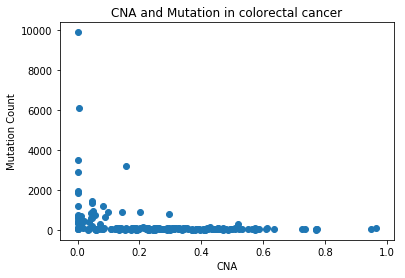

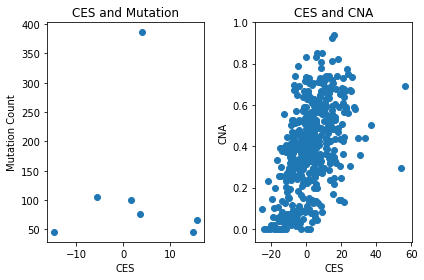

In [97]:
show_plots(colorectal, ces_color, 'colorectal')

# Lung Adenocarcinoma

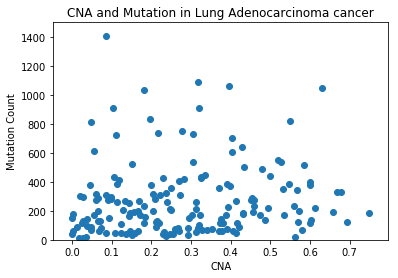

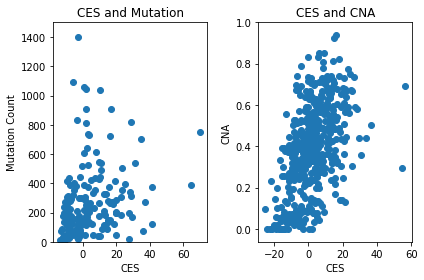

In [105]:
show_plots(lung_adeno, ces_adeno, 'Lung Adenocarcinoma',ylim_mut=1500)

# Lung Squamous Cell Carcinoma 

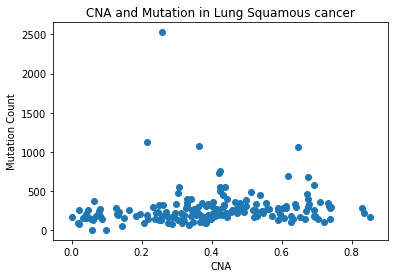

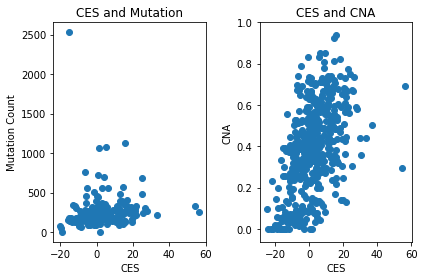

In [100]:
show_plots(lung_squa, ces_squa, 'Lung Squamous')